In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
file_path = 'usedcars.csv'
data = pd.read_csv(file_path)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [21]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,34999.0


In [4]:
# Data Cleaning
data['milage'] = data['milage'].str.replace(',', '').str.replace(' mi.', '', regex=False).astype(float)
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data['clean_title'] = data['clean_title'].fillna('Unknown')

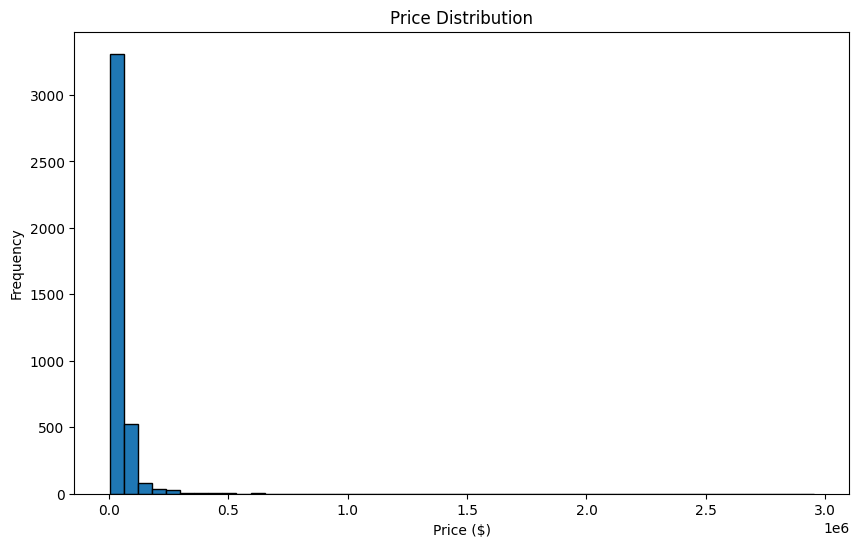

In [5]:
# Price distribution
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=50, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

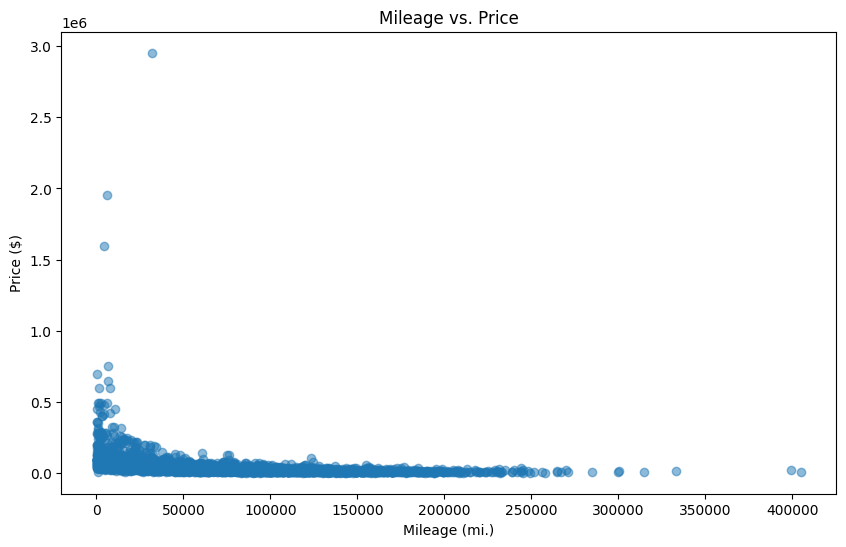

In [6]:
# Mileage vs. Price scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['milage'], data['price'], alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage (mi.)')
plt.ylabel('Price ($)')
plt.show()

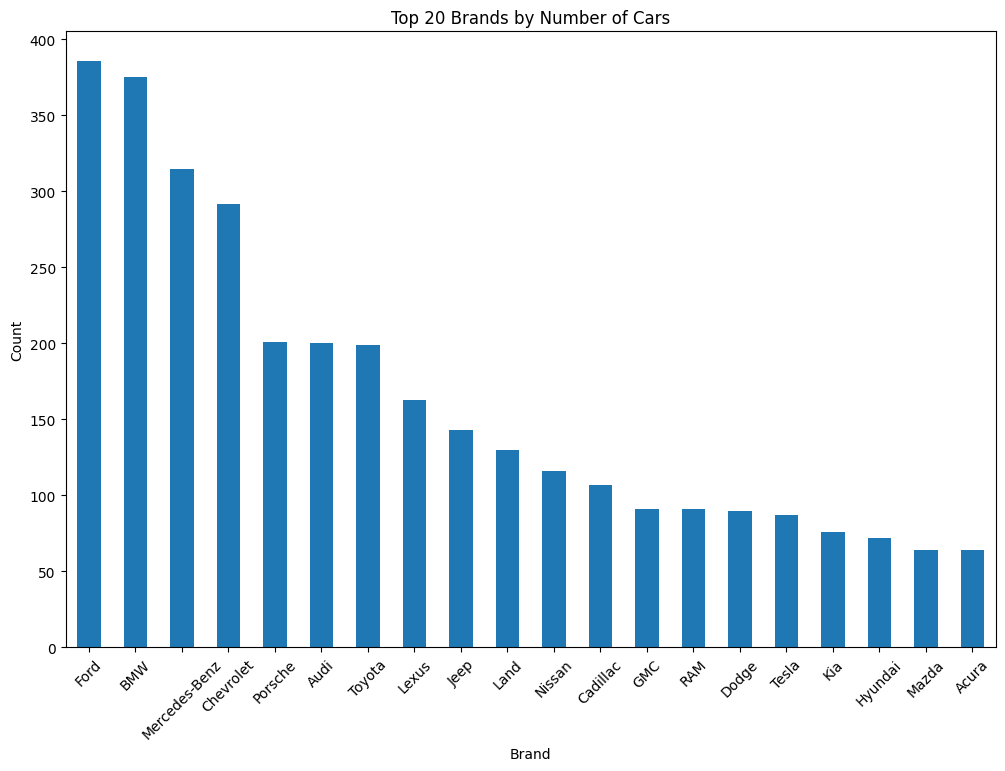

In [7]:
# Distribution of cars by brand
plt.figure(figsize=(12, 8))
data['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Brands by Number of Cars')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

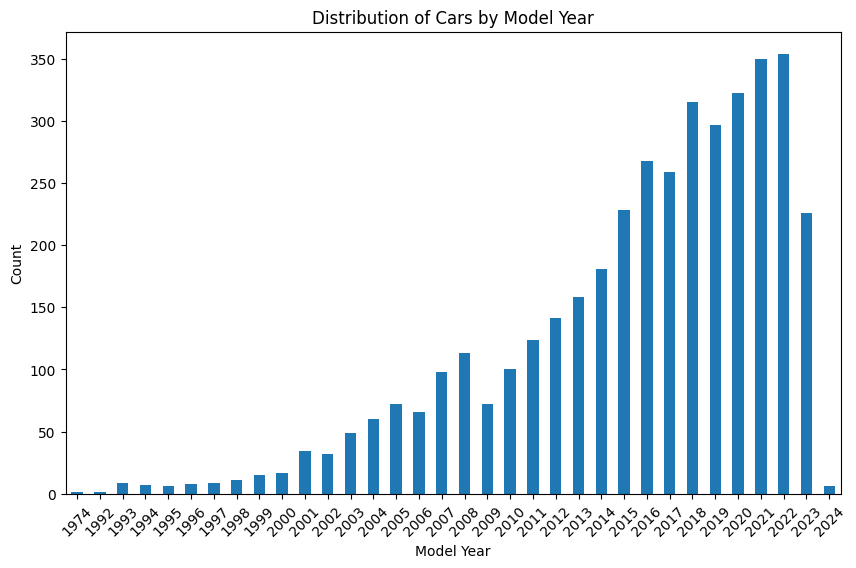

In [8]:
# Distribution of cars by year
plt.figure(figsize=(10, 6))
data['model_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Feature Engineering
features = data[['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col']]
target = data['price']

In [13]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(features[['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col']])
numeric_features = features[['model_year', 'milage']].to_numpy()
X = np.hstack([numeric_features, encoded_features])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

In [15]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [16]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 20687.549077306736
Root Mean Squared Error (RMSE): 134512.0815371344


In [17]:
new_data = pd.DataFrame({
    'brand': ['Toyota', 'Ford'],
    'model_year': [2020, 2018],
    'milage': [15000, 30000],
    'fuel_type': ['Gasoline', 'Hybrid'],
    'transmission': ['Automatic', '6-Speed A/T'],
    'ext_col': ['White', 'Black'],
    'int_col': ['Gray', 'Black']
})

new_encoded_features = encoder.transform(new_data[['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col']])
new_numeric_features = new_data[['model_year', 'milage']].to_numpy()
new_X = np.hstack([new_numeric_features, new_encoded_features])

In [18]:
new_predictions = model.predict(new_X)

In [19]:
new_data['predicted_price'] = new_predictions

print(new_data)

    brand  model_year  milage fuel_type transmission ext_col int_col  \
0  Toyota        2020   15000  Gasoline    Automatic   White    Gray   
1    Ford        2018   30000    Hybrid  6-Speed A/T   Black   Black   

   predicted_price  
0         39186.63  
1         37133.33  
